In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('data.csv', header=None)
print(len(data))
data.head()

100


,0,1
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [4]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m *x + b)) **2
    return totalError / float(len(points))
        
def step_gradient(b_current, m_current, points, learningRate):
    # gradient dscent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]
    
def gradient_descent_runner(points, starting_b, starting_m, 
                            learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
    return [b,m]

def run():
    points = np.genfromtxt('data.csv', delimiter=',')
    learning_rate = 0.0001
    # y = mx + b (slope fomula)
    initial_b = 0
    initial_m = 0
    num_iterations = 2500
    [b, m] = gradient_descent_runner(points, 
                                     initial_b, initial_m, 
                                     learning_rate, num_iterations)
#     print(b)
#     print(m)
#     print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, 
#                                                                               initial_m, 
#                                                                               compute_error_for_line_given_points(initial_b, initial_m, points)))
#     print("Running...")
#     [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
#     print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, 
#                                                                       b, m, 
#                                                                       compute_error_for_line_given_points(b, m, points)))

In [5]:
if __name__=="__main__":
    run()

In [6]:
points = np.genfromtxt('data.csv', delimiter=',')
x = points[:, 0]
y = points[:, 1]

## Ridge Regression (L2 Norm)

In [7]:
N = 50

X = np.linspace(0, 10, N)
Y = 0.5*X + np.random.randn(N)

Y[-1] += 30
Y[-2] += 30

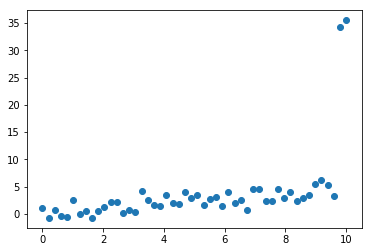

In [8]:
plt.scatter(X, Y)
plt.show()

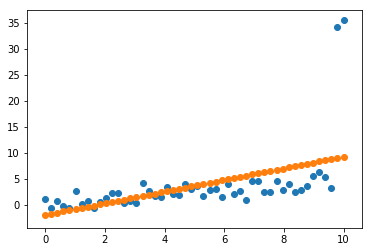

In [9]:
X = np.vstack([np.ones(N), X]).T

w_ml = np.linalg.solve(X.T.dot(X), X.T.dot(Y))
Yhat_ml = X.dot(w_ml)

plt.scatter(X[:,1], Y)
plt.scatter(X[:,1], Yhat_ml)
plt.show()

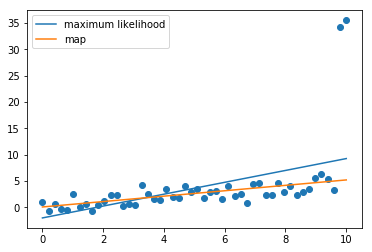

In [10]:
# penalty
l2 = 1000.0

w_map = np.linalg.solve(l2*np.eye(2) + X.T.dot(X), X.T.dot(Y))
Yhat_map = X.dot(w_map)

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], Yhat_ml, label='maximum likelihood')
plt.plot(X[:,1], Yhat_map, label='map')
plt.legend()
plt.show()

## Lasso Regression (L1 Norm)

In [11]:
N = 50
D = 50

X = (np.random.random((N, D)) - 0.5)*10

true_w = np.array([1, 0.5, -0.5] + [0]*(D-3))

Y = X.dot(true_w) + np.random.randn(N)*0.5

costs = []
w = np.random.randn(D) / np.sqrt(D)
learning_rate = 0.001
l1 = 10.0

for t in range(500):
    Yhat = X.dot(w)
    delta = Yhat - Y
    w = w - learning_rate * (X.T.dot(delta) + l1*np.sign(w))
    
    mse =delta.dot(delta) / N
    costs.append(mse)

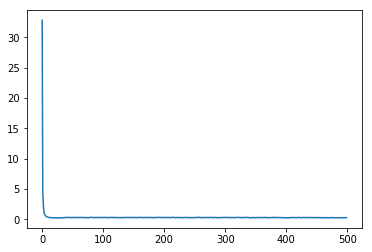

final w: [ 9.79529997e-01  4.72368290e-01 -4.56844846e-01 -4.62860674e-03
 -1.12643949e-02 -4.51571649e-03 -1.34711467e-02 -5.20113949e-03
  1.03810314e-02 -9.38685388e-03  2.37777209e-03 -2.31058403e-03
 -1.38105249e-02  1.71899537e-02  3.75417929e-03  7.84612445e-04
  7.02055667e-03  8.58258724e-05  8.75275006e-03 -1.21241764e-02
 -4.01433724e-03 -1.10776208e-02  1.72903901e-02  3.51575878e-03
 -2.37762433e-03  1.63187703e-02 -1.07426307e-03 -2.04680838e-02
 -8.75300904e-03 -3.34183886e-03  1.00196389e-02 -1.26981729e-02
 -8.35304731e-03  1.97959250e-02  7.25094994e-03 -1.36000662e-02
  2.01011584e-03  6.02389723e-04 -8.47606627e-03 -1.25156991e-02
 -3.97078692e-03  2.30384662e-03  1.36629951e-02 -2.17790462e-02
  1.74782868e-02  1.69962269e-02 -5.43765500e-02 -1.14997064e-02
  1.60000278e-03 -2.05539534e-02]


In [12]:
plt.plot(costs)
plt.show()

print(f'final w: {w}')

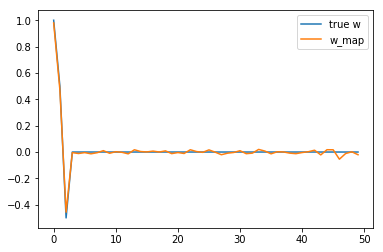

In [13]:
plt.plot(true_w, label='true w')
plt.plot(w, label='w_map')
plt.legend()
plt.show()

In [14]:
def ridge_regression(x_train, y_train, lam):
    
    X = np.array(x_train)
    ones = np.ones(len(X))
    X = np.column_stack((ones, X))
    y = np.array(y_train)
    
    Xt = np.transpose(X)
    lambda_identity = lam * np.identity(len(Xt))
    theInverse = np.linalg.inv(np.dot(Xt, X)) * lambda_identity
    w = np.dot(np.dot(theInverse, Xt), y)
    
    return w, lambda x: dot(w, x)

In [15]:
ridge_regression(X, Y, 0.5)

(array([ 3.87976403e+11,  2.13062773e+14,  7.52111021e+13, -6.74851775e+13,
        -8.79171945e+12,  2.96443727e+13, -1.60484843e+12, -8.36960080e+10,
         7.41736087e+13, -6.28274312e+12, -6.89977805e+12,  2.82960363e+12,
         1.28408174e+14,  1.02236689e+13, -5.89500900e+11, -1.27363227e+11,
         1.71029433e+13,  8.58472863e+12, -4.45224255e+10,  8.36801400e+12,
         8.85472440e+12,  2.86961131e+11, -3.07131610e+13,  9.94126461e+10,
        -3.78222572e+08,  6.45747575e+13, -8.17662919e+12, -1.18103885e+14,
        -4.84362714e+11, -1.90522117e+13,  1.96337506e+13,  2.61563593e+13,
         2.72700991e+13,  2.87537246e+11, -4.21894126e+13, -4.10184709e+11,
         1.99436205e+12,  3.31364666e+11,  1.80109899e+13,  3.01411137e+13,
         4.49891800e+11,  7.79405275e+12,  1.48598238e+13,  3.57700594e+12,
        -1.59379450e+13, -1.64747170e+14,  3.91301340e+11, -2.54222968e+13,
        -2.24151636e+12, -9.25027662e+13,  5.15834656e+13]),
 <function __main__.ridge_r

In [16]:
y.shape

(100,)

## Logistic Regression

In [17]:
%matplotlib inline

from patsy import dmatrices
import warnings

In [18]:
def sigmoid(x):
    '''Sigmoid function of x'''
    
    return 1 / (1 + np.exp(-x))

In [19]:
sigmoid(90)

1.0

####  Define Model Parameters (Hyperparameters)

In [36]:
import warnings

np.random.seed(0) # set the seed

##Step 1 - Define model parameters (hyperparameters)

## algorithm settings
#the minimum threshold for the difference between the predicted output and the actual output
#this tells our model when to stop learning, when our prediction capability is good enough
tol=1e-8 # convergence tolerance

lam = None # l2-regularization
#how long to train for?
max_iter = 20 # maximum allowed iterations

## data creation settings
#Covariance measures how two variables move together. 
#It measures whether the two move in the same direction (a positive covariance) 
#or in opposite directions (a negative covariance). 
r = 0.95 # covariance between x and z
n = 1000 # number of observations (size of dataset to generate) 
sigma = 1 # variance of noise - how spread out is the data?

## model settings
beta_x, beta_z, beta_v = -4, .9, 1 # true beta coefficients
var_x, var_z, var_v = 1, 1, 4 # variances of inputs

## the model specification you want to fit
formula = 'y ~ x + z + v + np.exp(x) + I(v**2 + z)'

#### Generate & Organize Data

In [37]:
#lets keep x and z closely related (height and weight)
x, z = np.random.multivariate_normal([0,0], [[var_x,r],[r,var_z]], n).T
#blood presure
v = np.random.normal(0,var_v,n)**3

#create a pandas dataframe (easily parseable object for manipulation)
A = pd.DataFrame({'x' : x, 'z' : z, 'v' : v})
#compute the log odds for our 3 independent variables
#using the sigmoid function 
A['log_odds'] = sigmoid(A[['x','z','v']].dot([beta_x,beta_z,beta_v]) + sigma*np.random.normal(0,1,n))



#compute the probability sample from binomial distribution
#A binomial random variable is the number of successes x has in n repeated trials of a binomial experiment. 
#The probability distribution of a binomial random variable is called a binomial distribution. 
A['y'] = [np.random.binomial(1,p) for p in A.log_odds]

#create a dataframe that encompasses our input data, model formula, and outputs
y, X = dmatrices(formula, A, return_type='dataframe')

#print it
X.head(100)

/Users/marktblack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


AssertionError: 

In [ ]:
#like dividing by zero (Wtff omgggggg universe collapses)
def catch_singularity(f):
    '''Silences LinAlg Errors and throws a warning instead.'''
    
    def silencer(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except np.linalg.LinAlgError:
            warnings.warn('Algorithm terminated - singular Hessian!')
            return args[0]
    return silencer

In [22]:
A = pd.DataFrame({'x': x,
                  'z': z,
                  'v': v})

A['log_odds'] = sigmoid(A[['x', 'z', 'v']].dot([beta_x, beta_z, beta_v]) + \
                        sigma*np.random.normal(0, 1, n))

A['y'] = [np.random.binomial(1, p) for p in A.log_odds]

/Users/marktblack/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


In [23]:
A.head()

,v,x,z,log_odds,y
0,-230.536312,-1.805133,-1.678592,1.124697e-97,0
1,-321.120883,-1.320743,-0.612110,6.935508e-138,0
2,0.006285,-1.689545,-1.998587,9.922420e-01,1
3,-56.335960,-0.914205,-0.962069,7.161166e-24,0
4,-0.033775,0.036999,0.166842,2.240063e-01,0


In [24]:
y, X = dmatrices(formula, A, return_type='dataframe')

X.head(100)

AssertionError: 

In [ ]:
def catch_singularity(f):
    '''
    Silences LinAlg Errors & throws a warning instead
    '''
    
    def silencer(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except np.linalg.LinAlgError:
            warnings.warn('Algorithm terminated - singular Hessian!')
            return args[0]
    return silencer

In [ ]:
@catch_singularity
def newton_step(curr, X, lam=None):
    # create probability matrix, minimum 2 dimensions, tranpose (flip it)
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T
    # create weight matrix from it
    W = np.diag((p*(1-p))[:,0])
    # derive the hessian
    hessian = X.T.dot(W).dot(X)
    # derive the gradient
    grad = X.T.dot(y-p)
    
    # regularization step (avoiding overfitting)
    if lam:
        step, *_ = np.linalg.lstsq(hessian + lam*np.eye(curr.shape[0]), grad)
    else:
        step, *_ = np.linalg.lstsq(hessian, grad)
        
    ## update our
    beta = curr + step
    
    return beta

In [ ]:
@catch_singularity
def alt_newton_step(curr, X, lam=None):
    '''
    One naive step of Newton's Method
    '''
    
    ## compute necessary objects
    p = np.array(sigmoid(X.dot(curr[:,0])), ndmin=2).T
    W = np.diag((p*(1-p))[:,0])
    hessian = X.T.dot(W).dot(X)
    grad = X.T.dot(y-p)
    
    if lam:
        step = np.dot(np.linalg.inv(hessian + lam*np.eye(curr.shape[0])), grad)
    else:
        step = np.dot(np.linalg.inv(hessian), grad)
        
        beta = curr + step
        
    return beta

## Softmax as a Converter of LR into Probabilities

In [25]:
import math

z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]

z_exp = [math.exp(i) for i in z]
print([round(i, 2) for i in z_exp])

[2.72, 7.39, 20.09, 54.6, 2.72, 7.39, 20.09]


In [26]:
sum(z_exp)

114.98389973429897

In [27]:
softmax = [i / sum(z_exp) for i in z_exp]
print([round(i, 4) for i in softmax])

[0.0236, 0.0643, 0.1747, 0.4748, 0.0236, 0.0643, 0.1747]


In [33]:
sigmoid(-5)

0.0066928509242848554

In [40]:
np.log(105) - np.log(100)

0.04879016416943127

## Naive Bayes Classifier

https://appliedmachinelearning.blog/2017/05/23/understanding-naive-bayes-classifier-from-scratch-python-code/

$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}$$

which is equivalent to:

$$posterior\ probability=\frac{likelihood * prior\ probability}{evidence}$$

In [41]:
import numpy as np
training = np.asarray(((1,0,1,1),
                       (1,1,0,0),
                       (1,0,2,1),
                       (0,1,1,1),
                       (0,0,0,0),
                       (0,1,2,1),
                       (0,1,2,0),
                       (1,1,1,1)));
outcome = np.asarray((0,1,1,1,0,1,0,1))

In [47]:
# Calculate the Prior Probabilities

from collections import Counter, defaultdict

def occurrences(outcome):
    no_of_examples = len(outcome)
    prob = dict(Counter(outcome))
    for key in prob.keys():
        prob[key] = prob[key] / float(no_of_examples)
    return prob

In [50]:
np.shape(training)

(8, 4)

In [61]:
def naive_bayes(training, outcome, new_sample):
    classes     = np.unique(outcome)
    rows, cols  = np.shape(training)
    likelihoods = {}
    for cls in classes:
        likelihoods[cls] = defaultdict(list)
  
    class_probabilities = occurrences(outcome)
  
    for cls in classes:
        row_indices = np.where(outcome == cls)[0]
        subset      = training[row_indices, :]
        r, c        = np.shape(subset)
        for j in range(0,c):
            likelihoods[cls][j] += list(subset[:,j])
  
    for cls in classes:
        for j in range(0,cols):
             likelihoods[cls][j] = occurrences(likelihoods[cls][j])
  
  
    results = {}
    for cls in classes:
         class_probability = class_probabilities[cls]
         for i in range(0,len(new_sample)):
             relative_values = likelihoods[cls][i]
             if new_sample[i] in relative_values.keys():
                 class_probability *= relative_values[new_sample[i]]
             else:
                 class_probability *= 0
             results[cls] = class_probability
    print(results)
                
        

In [62]:
if __name__ == '__main__':
    training   = np.asarray(((1,0,1,1),(1,1,0,0),(1,0,2,1),
                             (0,1,1,1),(0,0,0,0),(0,1,2,1),
                             (0,1,2,0),(1,1,1,1)));
    outcome    = np.asarray((0,1,1,1,0,1,0,1))
    new_sample = np.asarray((1,0,1,0))
    naive_bayes(training, outcome, new_sample)

{0: 0.018518518518518517, 1: 0.006000000000000002}


## Naive Bayes Python Code

In [3]:
import numpy as np
# from util import get_data
from datetime import datetime
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn

In [5]:
class NaiveBayes(object):
    
    def fit(self, X, Y, smoothing=10e-3):
        self.gaussians = dict()
        self.priors = dict()
        labels = set(Y)
        
        for c in labels:
            current_x = X[Y == c]
            self.gaussians[c] = {
                'mean': current_x.mean(axis=0),
                'var': current_x.var(axis=0) + smoothing,
            }
            self.priors[c] = float(len(Y[Y == c])) / len(Y)
            
        def score(self, X, Y):
            P = self.predict(X)
            return np.mean(P == Y)
        
        def predict(self, X):
            N, D = X.shape
            K = len(self.gaussians)
            P = np.zeros((N, K))
            for c, g in self.gaussians.iteritems():
                mean, var = g['mean'], g['var']
                P[:, c] = mvn.logpdf(X, mean=mean, cov=var) + np.log(self.priors[c])
            return np.argmax(P, axis=1)

In [6]:
if __name__ == '__main__':
    X, Y = get_data(10000)
    Ntrain = len(Y) / 2
    Xtrain, Ytrain = X[:Ntrain], Y[:Ntrain]
    Xtest, Ytest = X[Ntrain:], Y[Ntrain:]
    
    model = NaiveBayes()
    t0 = datetime.now()
    model.fit(Xtrain, Ytrain)
    print("Training time:", (datetime.now() - t0))
    
    t0 = datetime.now()
    print("Training accuracy", model.score(Xtrain, Ytrain))
    print("Time to compute train accuracy:", (datetime.now() - t0),
         "Train size:" (len(Ytrain)))
    
    t0 = datetime.now()
    print("Testing accuracy", model.score(Xtest, Ytest))
    print("Time to compute test accuracy:", (datetime.now() - t0),
         "Test size:" (len(Ytest)))

NameError: name 'get_data' is not defined

## Brownian Motion

In [7]:
from math import sqrt
from scipy.stats import norm
import numpy as np

In [8]:
def brownian(x0, n, dt, delta, out=None):
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    
    if out is None:
        out = np.empty(r.shape)
        
    np.cumsum(r, axis=1, out=out)
    
    out += np.expand_dims(x0, axis=-1)
    
    return out

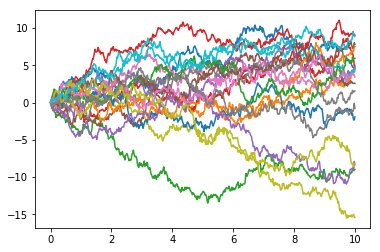

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

delta = 2
T = 10.0
N = 500
dt = T/N
m = 20
x = np.empty((m, N+1))
x[:, 0] = 0

brownian(x[:, 0], N, dt, delta, out=x[:,1:])

t = np.linspace(0.0, N*dt, N+1)
for k in range(m):
    plt.plot(t, x[k])
# grid(True)
plt.show()

## Decision Tree

In [17]:
from __future__ import print_function

In [14]:
training_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 3, 'Apple'],
    ['Red', 1, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon'],
]

In [21]:
training_data

[['Green', 3, 'Apple'],
 ['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

In [18]:
header = ['color', 'diameter', 'label']

In [19]:
def unique_vals(rows, col):
    return set([row[col] for row in rows])

In [25]:
# Demo:
unique_vals(training_data, 0)

{'Green', 'Red', 'Yellow'}

In [27]:
def class_counts(rows):
    """
    Counts the number of each type of example in dataset
    """
    counts = {}
    for row in rows:
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

In [28]:
# Demo:
class_counts(training_data)

{'Apple': 2, 'Grape': 2, 'Lemon': 1}

In [29]:
def is_numeric(value):
    """
    Test if a value is numeric.
    """
    return isinstance(value, int) or isinstance(value, float)

In [30]:
# Demo
is_numeric(7)

True

In [32]:
class Question:
    """
    A question is used to partition a dataset.
    
    This class just records a 'column number' (i.e., 0 for color) and a 
    'column value' (i.e. green). The 'match' method is used to compare the 
    feature value in an example to the feature value stored in the question.
    See demo below:
    """
    def __init__(self, column, value):
        self.column = column
        self.value = value
        
    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if is_numeric(val):
            return val >= self.value
        else:
            return val == self.value
        
    def __repr__(self):
        # This is just a helper method to print
        # the question in a readable format
        condition = "=="
        if is_numeric(self.value):
            condition = ">="
        return "Is %s %s %s?" % (
            header[self.column], condition, str(self.value))

In [39]:
# Demo
q = Question(0, 'Green')

In [38]:
# Demo (numeric)
Question(1, 3)

Is diameter >= 3?

In [40]:
# Pick an example from the training set
example = training_data[0]
# ... and see if it matches the question
q.match(example) # this will be true, since the first example is Green/

True

In [41]:
def partition(rows, question):
    """
    Partitions in a dataset.
    
    For each row in the dataset, check if it matches the question.
    If so, add it to 'true rows', otherwise, add it to 'false rows    
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows

In [42]:
# Demo:
true_rows, false_rows = partition(training_data, Question(0, 'Red'))
true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

In [45]:
# Containing everything else
false_rows

[['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon']]

In [119]:
def gini(rows):
    """
    Calculate the Gini Impurity for a list of rows.
    
    There are a few different ways to do this, I thought this one was the most concise.
    See: 
    https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity
    """
    
    counts = class_counts(rows)
    print(counts)
    impurity = 1
    for lbl in counts:
        print(counts[lbl])
        prob_of_lbl = counts[lbl] / float(len(rows))
        print(prob_of_lbl)
        impurity -= prob_of_lbl**2
        print(impurity)
    return impurity

In [120]:
# Demo

no_mixing = [['Apple'], ['Apple']]

gini(no_mixing)

{'Apple': 2}
2
1.0
0.0


0.0

In [89]:
some_mixing = [['Apple'], ['Orange']]

gini(some_mixing)

{'Apple': 1, 'Orange': 1}


0.5

In [118]:
# Now, we'll look at a dataset with many different labels
lots_of_mixing = [['Apple'],
                  ['Orange'],
                  ['Grape'],
                  ['Grapefruit'],
                  ['Blueberry']]
# This will return 0.8
gini(lots_of_mixing)

{'Apple': 1, 'Orange': 1, 'Grape': 1, 'Grapefruit': 1, 'Blueberry': 1}
0.2
0.96
0.2
0.9199999999999999
0.2
0.8799999999999999
0.2
0.8399999999999999
0.2
0.7999999999999998


0.7999999999999998

In [91]:
def info_gain(left, right, current_uncertainty):
    """
    Information Gain.
    
    The uncertainty of the starting node minus the weighted impurity of
    the 2 child nodes.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1-p) * gini(right)

In [92]:
current_uncertainty = gini(training_data)
current_uncertainty

{'Apple': 2, 'Grape': 2, 'Lemon': 1}


0.6399999999999999

In [93]:
# How much info do we gain by partitioning on 'Green'?
true_rows, false_rows = partition(training_data, Question(0, 'Green'))
info_gain(true_rows, false_rows, current_uncertainty)

{'Apple': 1}
{'Apple': 1, 'Grape': 2, 'Lemon': 1}


0.1399999999999999

In [94]:
# What about if we partitioned on 'Red' instead?
true_rows, false_rows = partition(training_data, Question(0, 'Red'))

true_rows

[['Red', 1, 'Grape'], ['Red', 1, 'Grape']]

In [95]:
false_rows

[['Green', 3, 'Apple'], ['Yellow', 3, 'Apple'], ['Yellow', 3, 'Lemon']]

In [96]:
true_rows, false_rows = partition(training_data, Question(0, 'Green'))

len(true_rows)

1

In [97]:
false_rows

[['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

In [98]:
def find_best_split(rows):
    """
    Find the best question to ask by iterating over every feature / value
    and calculating the information gain.
    """
    best_gain = 0 # initialize and keep track of the best IG
    best_question = None # keep train of the feature / value that produced it
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1 # number of columns
    
    for col in range(n_features): # for each feature
        
        values = set([row[col] for row in rows]) # unique values in the column
        
        for val in values: # for each value
            
            question = Question(col, val)
            
            #try splitting the dataset
            true_rows, false_rows = partition(rows, question)
            
            # Skip the split if it doesn't divide the dataset
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue
            
            # Calculate the IG from this split
            gain = info_gain(true_rows, false_rows, current_uncertainty)
            
            # You actually can use '>' instead of '>=' here
            # but I wanted the tree to look a certain way for our 
            # toy dataset
            if gain >= best_gain:
                best_gain, best_question = gain, question
                
    return best_gain, best_question

In [99]:
# Demo
best_gain, best_question = find_best_split(training_data)
print(best_gain)
print(best_question)

{'Apple': 2, 'Grape': 2, 'Lemon': 1}
{'Grape': 2}
{'Apple': 2, 'Lemon': 1}
{'Apple': 1}
{'Apple': 1, 'Grape': 2, 'Lemon': 1}
{'Apple': 1, 'Lemon': 1}
{'Apple': 1, 'Grape': 2}
{'Apple': 2, 'Lemon': 1}
{'Grape': 2}
0.37333333333333324
Is diameter >= 3?


In [100]:
class Leaf:
    """
    A leaf node classifies data.
    
    This holds a dictionary of class (i.e. "Apple") --> number of times
    it appears in the rows from the training data that reach this leaf.
    """
    
    def __init__(self, rows):
        self.predictions = class_counts(rows)

In [101]:
class Decision_Node:
    """
    A Decision Node asks a question.
    
    This holds a reference to the question, & to the 2 child nodes.
    """
    
    def __init__(self, question, true_branch, false_branch):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch

In [102]:
def build_tree(rows):
    """
    Builds the tree.
    
    Rules of recursion:
    1) Believe that it works.
    2) Start by checking for the base case (no further info gain).
    3) Prepare for giant stack traces.
    """
    
    # Try partitioning the dataset on each of the unique attribute,
    # calculate the IG
    # return the question that produces the highest gain.
    gain, question = find_best_split(rows)
    
    # Base case: no further info gain
    # Since we can ask no further questions,
    # we'll return a Leaf.
    if gain == 0:
        return Leaf(rows)
    
    # if we reach here, we found a useful feature / value
    true_rows, false_rows = partition(rows, question)
    
    # Recursively build the true branch
    true_branch = build_tree(true_rows)
    
    # Recursively build the false branch
    false_branch = build_tree(false_rows)
    
    # Return a Question node.
    # This records the best feature / value to ask at this point,
    # as well as the branches to follow
    # depending on the answer
    return Decision_Node(question, true_branch, false_branch)

In [103]:
def print_tree(node, spacing=""):
    """World's most elegant tree printing function"""
    
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return
    
    # Print the question at this node
    print(spacing + str(node.question))
    
    # Call this function recursively on the true branch
    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")
    
    # Call this function recursively on the false branch
    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

In [104]:
my_tree = build_tree(training_data)

{'Apple': 2, 'Grape': 2, 'Lemon': 1}
{'Grape': 2}
{'Apple': 2, 'Lemon': 1}
{'Apple': 1}
{'Apple': 1, 'Grape': 2, 'Lemon': 1}
{'Apple': 1, 'Lemon': 1}
{'Apple': 1, 'Grape': 2}
{'Apple': 2, 'Lemon': 1}
{'Grape': 2}
{'Apple': 2, 'Lemon': 1}
{'Apple': 1}
{'Apple': 1, 'Lemon': 1}
{'Apple': 1, 'Lemon': 1}
{'Apple': 1}
{'Apple': 1, 'Lemon': 1}
{'Apple': 1}
{'Grape': 2}


In [105]:
print_tree(my_tree)

Is diameter >= 3?
--> True:
  Is color == Yellow?
  --> True:
    Predict {'Apple': 1, 'Lemon': 1}
  --> False:
    Predict {'Apple': 1}
--> False:
  Predict {'Grape': 2}


In [106]:
def classify(row, node):
    """
    See the 'rules of recursion' above.
    """
    
    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        return node.predictions
    
    # Decide whether to follow the true-branch or the false-branch.
    # Compare the feature /  value stored in the node,
    # to the example we're considering.
    if node.question.match(row):
        return classify(row, node.true_branch)
    else:
        return classify(row, node.false_branch)

In [107]:
# Demo
classify(training_data[0], my_tree)

{'Apple': 1}

In [108]:
def print_leaf(counts):
    """
    A nicer way to print the predictions at a leaf.
    """
    total = sum(counts.values()) * 1.0
    probs = {}
    for lbl in counts.keys():
        probs[lbl] = str(int(counts[lbl] / total * 100)) + "%"
    return probs

In [109]:
print_leaf(classify(training_data[0], my_tree))

{'Apple': '100%'}

In [111]:
print_leaf(classify(training_data[1], my_tree))

{'Apple': '50%', 'Lemon': '50%'}

In [112]:
# Evaluate
testing_data = [
    ['Green', 3, 'Apple'],
    ['Yellow', 4, 'Apple'],
    ['Red', 2, 'Grape'],
    ['Red', 1, 'Grape'],
    ['Yellow', 3, 'Lemon']
]

In [114]:
for row in testing_data:
    print("Actual: %s. Predicted: %s" %
         (row[-1], print_leaf(classify(row, my_tree))))

Actual: Apple. Predicted: {'Apple': '100%'}
Actual: Apple. Predicted: {'Apple': '50%', 'Lemon': '50%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Grape. Predicted: {'Grape': '100%'}
Actual: Lemon. Predicted: {'Apple': '50%', 'Lemon': '50%'}


In [115]:
training_data

[['Green', 3, 'Apple'],
 ['Yellow', 3, 'Apple'],
 ['Red', 1, 'Grape'],
 ['Red', 1, 'Grape'],
 ['Yellow', 3, 'Lemon']]

## Econometrics

In [151]:
n = 10000
b = 1
rho = 1
alpha = 0.05

In [167]:
x = np.zeros([n, 1])
# x[0] = 0
y = np.zeros([n, 1])
# y[0] = 0

In [169]:
for i in range(1, n):
    x[i] = alpha + (rho*x[i-1]) + (b*np.random.randn())
#     print(temp_x)
#     x = np.append(x, temp_x)
    y[i] = (alpha*i) + (b*np.random.randn())
#     print(temp_y)
#     y = np.append(y, temp_y)

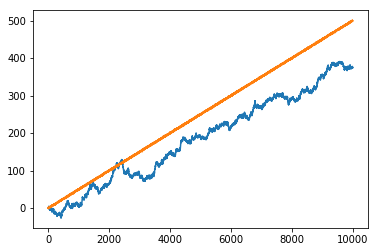

In [170]:
plt.plot(x)
plt.plot(y)
plt.show()

In [163]:
x

array([0.        , 0.        , 0.        , ..., 1.05460649, 1.7690688 ,
       1.89102434])

In [171]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [173]:
np.random.seed(1234)

pop_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
pop_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((pop_ages1, pop_ages2))

In [174]:
mn_ages1 = stats.poisson.rvs(loc=18, mu=20, size=30)
mn_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
mn_ages = np.concatenate((mn_ages1, mn_ages2))

In [177]:
print(pop_ages1.mean())
print(mn_ages.mean())

52.97834666666667
34.64


In [186]:
tstat, pvalue = stats.ttest_1samp(a=mn_ages, popmean=population_ages.mean())
print(tstat, pvalue)

-9.793672501251685 4.0035052661244947e-13


In [190]:
sigma = mn_ages.std() / math.sqrt(50)
print(sigma)

stats.t.interval(0.95, df=50-1, loc=mn_ages.mean(), scale=sigma)

0.8436871458070224


(32.94454720612932, 36.33545279387068)

## LDA

In [203]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [200]:
iris = datasets.load_iris()
X = iris.data[:, :4]  # we only take the first two features.
y = iris.target

In [240]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [230]:
X_y_arr = np.concatenate((X, y.reshape(150,1)), axis=1)

df = pd.DataFrame(X_y_arr)

In [231]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [241]:
label_dict = {0: 'Setosa', 1: 'Versicolor', 2:'Virginica'}

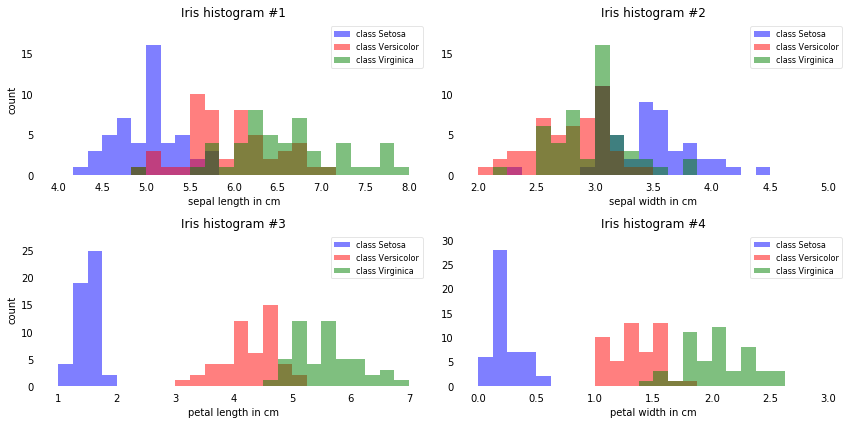

In [243]:
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab, col in zip(range(0,3), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

#### Compute Means

In [275]:
mean_vectors = []

for cl in range(0,3):
    mean_vectors.append(np.mean(X[y==cl], axis=0))
    print('Mean Vector class %s: %s\n' % (cl, mean_vectors[cl]))

Mean Vector class 0: [5.006 3.418 1.464 0.244]

Mean Vector class 1: [5.936 2.77  4.26  1.326]

Mean Vector class 2: [6.588 2.974 5.552 2.026]



In [276]:
S_W = np.zeros((4,4))

for cl, mv in zip(range(0,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))
    for row in X[y==cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1)
        class_sc_mat += (row-mv).dot((row-mv).T)
    S_W += class_sc_mat
    
print('within-class Scatter Matrix:\n', S_W)

within-class Scatter Matrix:
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]


In [282]:
class_sc_mat / 50

array([[0.396256, 0.091888, 0.297224, 0.048112],
       [0.091888, 0.101924, 0.069952, 0.046676],
       [0.297224, 0.069952, 0.298496, 0.047848],
       [0.048112, 0.046676, 0.047848, 0.073924]])

In [283]:
overall_mean = np.mean(X, axis=0)

S_B = np.zeros((4,4))

for i, mean_vec in enumerate(mean_vectors):
    n = X[y==i,:].shape[0]
    print(n)
    mean_vec = mean_vec.reshape(4,1)
    overall_mean = overall_mean.reshape(4,1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
print('between-class Scatter Matrix:\n', S_B)

50
50
50
between-class Scatter Matrix:
 [[ 63.21213333 -19.534      165.16466667  71.36306667]
 [-19.534       10.9776     -56.0552     -22.4924    ]
 [165.16466667 -56.0552     436.64373333 186.90813333]
 [ 71.36306667 -22.4924     186.90813333  80.60413333]]


In [294]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

print('Eigenvalue: %s\n' % eig_vals)
print('Eigenvectors: %s\n' % eig_vecs)

Eigenvalue: [ 3.22719578e+01  2.77566864e-01 -2.28331034e-15  6.34213497e-16]

Eigenvectors: [[ 0.20490976 -0.00898234  0.06655256 -0.3445975 ]
 [ 0.38714331 -0.58899857  0.31429275  0.42493152]
 [-0.54648218  0.25428655  0.38544266  0.47880589]
 [-0.71378517 -0.76703217 -0.86499987 -0.6866081 ]]



In [295]:
for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:, i].reshape(4,1)
    print('\nEigenvectors {}: \n{}'.format(i, eigvec_sc.real))
    print('\nEigenvalue {:}: {:.4e}'.format(i, eig_vals[i].real))


Eigenvectors 0: 
[[ 0.20490976]
 [ 0.38714331]
 [-0.54648218]
 [-0.71378517]]

Eigenvalue 0: 3.2272e+01

Eigenvectors 1: 
[[-0.00898234]
 [-0.58899857]
 [ 0.25428655]
 [-0.76703217]]

Eigenvalue 1: 2.7757e-01

Eigenvectors 2: 
[[ 0.06655256]
 [ 0.31429275]
 [ 0.38544266]
 [-0.86499987]]

Eigenvalue 2: -2.2833e-15

Eigenvectors 3: 
[[-0.3445975 ]
 [ 0.42493152]
 [ 0.47880589]
 [-0.6866081 ]]

Eigenvalue 3: 6.3421e-16


In [296]:
# Check to ensure that Av =lamv
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_B).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


In [303]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

eig_pairs
# print('Eigenvalues in decreasing order:\n')
# for i in eig_pairs:
#     print(i[0])

[(32.27195779972982,
  array([ 0.20490976,  0.38714331, -0.54648218, -0.71378517])),
 (0.2775668638400461,
  array([-0.00898234, -0.58899857,  0.25428655, -0.76703217])),
 (2.2833103419793817e-15,
  array([ 0.06655256,  0.31429275,  0.38544266, -0.86499987])),
 (6.342134974218695e-16,
  array([-0.3445975 ,  0.42493152,  0.47880589, -0.6866081 ]))]

### Print Variance Explained

In [318]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i, j in enumerate(eig_pairs):
    print('Eigenvalue {0:}: {1:.2%}'.format(i, (j[0]/eigv_sum).real))

Variance explained:

Eigenvalue 0: 99.15%
Eigenvalue 1: 0.85%
Eigenvalue 2: 0.00%
Eigenvalue 3: 0.00%


In [323]:
W = np.hstack((eig_pairs[0][1].reshape(4, 1), eig_pairs[1][1].reshape(4, 1)))
print(W.real)

[[ 0.20490976 -0.00898234]
 [ 0.38714331 -0.58899857]
 [-0.54648218  0.25428655]
 [-0.71378517 -0.76703217]]


In [338]:
X_lda = X.dot(W)
X_lda.shape

(150, 2)

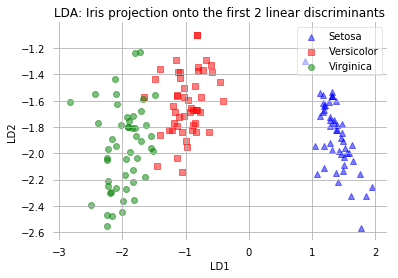

In [351]:
def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(0,3),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

In [341]:
W_2 = eig_pairs[0][1].reshape(4, 1)
W_2

array([[ 0.20490976],
       [ 0.38714331],
       [-0.54648218],
       [-0.71378517]])

In [343]:
X2_lda = X.dot(W_2)

X2_lda

array([[ 1.49220928],
       [ 1.25765567],
       [ 1.3487506 ],
       [ 1.18024885],
       [ 1.51043263],
       [ 1.40183784],
       [ 1.27966155],
       [ 1.37835575],
       [ 1.11648646],
       [ 1.3131003 ],
       [ 1.57646265],
       [ 1.28272558],
       [ 1.30854321],
       [ 1.37003298],
       [ 1.9385142 ],
       [ 1.76617886],
       [ 1.62043071],
       [ 1.42083076],
       [ 1.49597495],
       [ 1.48232553],
       [ 1.35102322],
       [ 1.37223268],
       [ 1.6470616 ],
       [ 1.03670041],
       [ 1.11878093],
       [ 1.16885021],
       [ 1.1809505 ],
       [ 1.45805203],
       [ 1.47398592],
       [ 1.18480594],
       [ 1.16658259],
       [ 1.31756262],
       [ 1.76171654],
       [ 1.8451735 ],
       [ 1.3131003 ],
       [ 1.46487174],
       [ 1.6288214 ],
       [ 1.3131003 ],
       [ 1.20984901],
       [ 1.39884673],
       [ 1.454988  ],
       [ 0.88796115],
       [ 1.28727767],
       [ 1.07690779],
       [ 1.19235414],
       [ 1

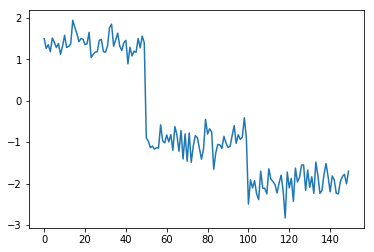

In [349]:
plt.plot(X2_lda[:,0])
plt.show()

## PCA

In [378]:
import numpy as np

np.random.seed(1234)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])

class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20)

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20)

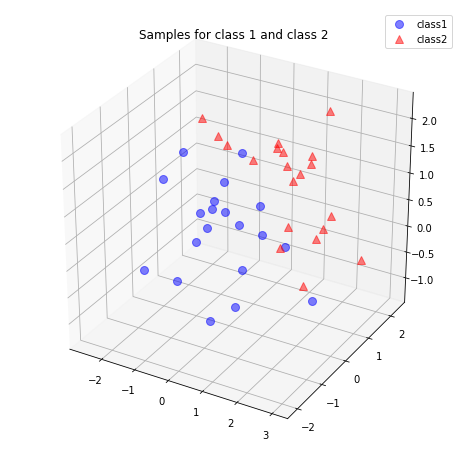

In [382]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:],
       'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], 
        '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [384]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3, 40)

In [387]:
mean_x = np.mean(all_samples[0, :])
mean_y = np.mean(all_samples[1, :])
mean_z = np.mean(all_samples[2, :])

mean_vector = np.array([[mean_x], [mean_y], [mean_z]])

print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.53513993]
 [0.3204501 ]
 [0.74643724]]


### Scatter Matrix

In [389]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1)-\
                       mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('scatter matrix:\n', scatter_matrix)

scatter matrix:
 [[69.32153776 -0.44803277 -2.35946406]
 [-0.44803277 42.94895756  6.02095291]
 [-2.35946406  6.02095291 25.85365764]]


### Covariance Matrix (alternative way)

In [390]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:], all_samples[2,:]])

print('covariance matrix\n', cov_mat)

covariance matrix
 [[ 1.77747533 -0.01148802 -0.06049908]
 [-0.01148802  1.10125532  0.15438341]
 [-0.06049908  0.15438341  0.6629143 ]]


### Computing Eigenvectors & Corresponding Eigenvalues

In [394]:
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all()
    
    print('Eigenvector: {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i] / eig_val_cov[i])
    print(40 * '-')

Eigenvector: 1: 
[[ 0.99785694]
 [-0.03005032]
 [-0.0581249 ]]
Eigenvalue 1 from scatter matrix: 69.47246835455627
Eigenvalue 1 from covariance matrix: 1.781345342424521
Scaling factor:  38.99999999999997
----------------------------------------
Eigenvector: 2: 
[[-0.04649955]
 [ 0.2993114 ]
 [-0.95302176]]
Eigenvalue 2 from scatter matrix: 23.847560879317143
Eigenvalue 2 from covariance matrix: 0.6114759199824904
Scaling factor:  39.00000000000003
----------------------------------------
Eigenvector: 3: 
[[-0.04603605]
 [-0.95368216]
 [-0.29727263]]
Eigenvalue 3 from scatter matrix: 44.80412372467968
Eigenvalue 3 from covariance matrix: 1.1488236852481977
Scaling factor:  38.99999999999997
----------------------------------------


In [396]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), 
                                        eig_val_sc[i] * eigv,
                                       decimal=6, err_msg='',
                                       verbose=True)

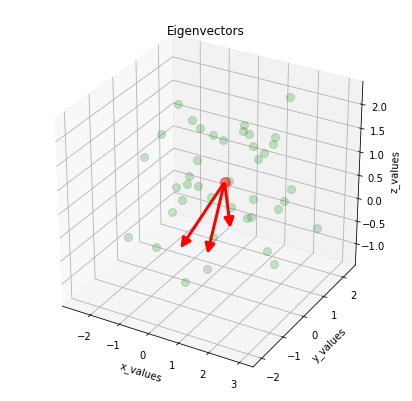

In [397]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()


In [398]:
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

for i in eig_pairs:
    print(i[0])

69.47246835455627
44.80412372467968
23.847560879317143
